## Purpose:

#### Generate report style infographic --

This notebook is intended to be a 'summary' report guide. It organizes the elements present in preceding notebooks and generates summary maps and text

In [18]:
import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [19]:
# delte this is temporary--
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import calculate_histogram_data


from src.utils.universal_functions.setup.generate_base_file import give_primary_frame

from src.utils.functions_for_return_periods.insurance_products_for_RP import insurance_files

#Functions for graphics:
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import clean_info_dataframe, query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe

from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_table import image_save_returnperiodtable
from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_lineplot import plot_histogram_with_lineplot_4
from src.utils.functions_for_graphics.individual_graphics.image_annual_summary_table import plot_and_colorize_annual_table
from src.utils.functions_for_graphics.individual_graphics.image_map_for_Ei import image_save_map_E_i

#Mapping structure:
from src.utils.functions_for_graphics.layout_formats.event_cat_rp import map_event_cat_rp
from src.utils.functions_for_graphics.layout_formats.summary_of_top_years import map_top_years
#from src.utils.functions_for_graphics.layout_formats.Layout_single_method_option1 import mapped_option1


#functions for all methods
from src.utils.universal_functions.FAO_table_formatting.generate_output_tables import generate_and_give_info_dataframe



In [39]:
conflict_history = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 1988, 2021)
conflict_explore = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 2020, 2024)

100%|██████████| 40.0M/40.0M [00:02<00:00, 18.4MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 


/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


100%|██████████| 40.0M/40.0M [00:01<00:00, 24.8MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 


/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


In [41]:
conflict_history_copy = conflict_history
conflict_explore_copy = conflict_explore


conflict_history_max_year = max(conflict_history_copy['year'])
conflict_history_min_year = min(conflict_history_copy['year'])

explore_max_year = max(conflict_explore_copy['year'])
explore_min_year = min(conflict_explore_copy['year'])

print(conflict_history_max_year)
print(conflict_history_min_year)

print(explore_max_year)
print(explore_min_year)

2020
1989
2023
2021


### Provides the primary dataframes defined by the FAO request for information

#### Country Year 

### Select from:

#### 'standard' or 'aggregation' or 'smoothing'

In [102]:
method = 'standard' # 'standard' or 'aggregation' or 'smoothing'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'smoothing':
    value_field = 'perca_Mean'
else:
    value_field = 'percapita_100k'

### Select from:

#### 'Event year' or 'Country year'

In [103]:
return_period = 'Country year' # 'Event year' or 'Country year'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if return_period == 'Event year':
    insurance_attribute = 'return period' # This should eventually be changed and cleaned up
if return_period == 'Country year':
    insurance_attribute = 'Return Period' # This should eventually be changed and cleaned up

In [194]:
country = 'Burkina Faso'

### Select from:

#### integer value 2-10

A value error will be raised to prompt a new input if the selection does match specifications required for the intended method

In [195]:
aggregation = '3'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'aggregation' and int(aggregation) <= 1:
    raise ValueError("Aggregation value must be greater than 1 for the 'aggregation' method.")

if method == 'standard' or method == 'smoothing':
    aggregation = '1'
print(aggregation)

1


In [196]:
sort_annual_report_by = 'first_value' 

if method == 'smoothing':
    sort_annual_report_by = 'first_value' # 'first_value' or 'average_value' /// or year but this is not built in yet

print(sort_annual_report_by)

first_value


In [197]:
#Define analysis type:

#for now, this only informs the folder structure naming to distinguish between data collections:
analysis_type = 'out_of_sample' #historic | #predictions

In [198]:
conflict_history_copy = conflict_history
conflict_explore_copy = conflict_explore


hist_conflict_profile, hist_x, hist_y, hist_z = insurance_files(conflict_history_copy, country, method, return_period, aggregation_unit=aggregation)

expl_conflict_profile, expl_x, expl_y, expl_z = insurance_files(conflict_explore_copy, country, method, return_period, aggregation_unit=aggregation)


print('Providing files for review:')

print('Historic Conflict Scheme:')
print(hist_z)

print('Explored years dataframe:')
print(expl_x)

print('Explored annual summary dataframe:')
print(expl_y)



   c_id  country_name  C_start_year  C_end_year      0
0    47  Burkina Faso          1960        2050  33408
the length of country_ids for the selected country is: 1
printing he country and year dictionary:
{47: (1960, 2050)}
Index where percapita_100k equals 1: 97.1: 1.058600000000024
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables' already exists.
saving annual_summary table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables/Burkina Faso annual summary.csv
saving insurance table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables/Burkina Faso insurance table.csv
saving main dataframe table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables/Burkina Faso main dataframe.csv
   c_id  country_nam

In [199]:
info_df, color_scheme = generate_and_give_info_dataframe(hist_z, return_period, value_field, insurance_attribute)
print(info_df)

   Return Period          Range    Color               Label
0              0        0 - 0.0  #d5dbdb  Below 1 in 10 year
1             10      0.0 - 0.0  #377eb8        1 in 10 year
2             20      0.0 - 5.6  #e6ab02        1 in 20 year
3             50     5.6 - 23.3  #762a83        1 in 50 year
4            100  23.3 - 100000  #b2182b       1 in 100 year


#### Provide examples of when to drop and when not to drop RP values:

Do not drop when the maximum value of RP 0 is not zero:
   Return Period          Range    Color               Label
0              0        0 - 8.1  #d5dbdb  Below 1 in 10 year
1             10     8.1 - 21.3  #377eb8        1 in 10 year
2             20    21.3 - 41.5  #e6ab02        1 in 20 year
3             50    41.5 - 54.4  #762a83        1 in 50 year
4            100  54.4 - 100000  #b2182b       1 in 100 year

In [200]:
#define the return period that should be dropped (if any) DEFUALT: 0

#--------------------------------------------------------------------------------
#     This is what should be changed     
#--------------------------------------------------------------------------------
rp_to_drop=[0,10]
#--------------------------------------------------------------------------------
cleaned_labels, cleaned_thresholds, filtered_info = clean_info_dataframe(info_df,rp_to_drop)


print('Reference the Info Dataframe:')
print(filtered_info)
print()
print(f'Here are the labels to be referenced: {cleaned_labels}')
print(f'Here are the corresponding thresholds to be referenced: {cleaned_thresholds}')

Reference the Info Dataframe:
   Return Period          Range    Color          Label
2             20      0.0 - 5.6  #e6ab02   1 in 20 year
3             50     5.6 - 23.3  #762a83   1 in 50 year
4            100  23.3 - 100000  #b2182b  1 in 100 year

Here are the labels to be referenced: ['1 in 20 year', '1 in 50 year', '1 in 100 year']
Here are the corresponding thresholds to be referenced: [5.6, 23.3]


In [201]:
import pandas as pd

# Step 1: Split the 'Range' column into two columns (min and max)
filtered_info[['Range_min', 'Range_max']] = filtered_info['Range'].str.split(' - ', expand=True)
filtered_info['Range_min'] = filtered_info['Range_min'].astype(float)
filtered_info['Range_max'] = filtered_info['Range_max'].astype(float)

# Step 2: Create a function to map per capita values to the appropriate 'Return Period' and 'Label'
def map_return_period(per_capita_value):
    for _, row in filtered_info.iterrows():
        if row['Range_min'] <= per_capita_value < row['Range_max']:
            return pd.Series([row['Return Period'], row['Label']])
    return pd.Series([None, None])

# Step 3: Apply the function to the per_capita_df and assign the new 'Return Period' and 'Label' columns
expl_x[['Return Period', 'Label']] = expl_x['percapita_100k'].apply(map_return_period)

# Output the dataframe
#print(expl_x)

# Group by 'year' and 'Return Period', then count occurrences
aggregated_series = expl_x.groupby(['year', 'Return Period']).size().reset_index(name='Count')

# Pivot the DataFrame
pivoted_df = aggregated_series.pivot_table(index='year', columns='Return Period', values='Count', fill_value=0)

# Reset the index to make 'year' a column
pivoted_df = pivoted_df.reset_index()

pivoted_df = pivoted_df.rename_axis(None, axis=1)

#change label for '0' column:
if 0 in pivoted_df.columns:
    label_for_zero = expl_x.loc[expl_x['Return Period'] == 0, 'Label'].values[0]
    pivoted_df.rename(columns={0: label_for_zero}, inplace=True)

#Reformat the annual summary table to only contain the max event and average event
annual_summary_df = expl_y.drop(columns=['second_value', 'third_value'])

#Then merge the with count of R.P. events table just created on the field 'year'
merged_annual_summary = pd.merge(annual_summary_df, pivoted_df, on='year')
print('This is one option for presenting the featured sample years:')
print(merged_annual_summary)
#--------------------------------------------------------------------------------------------

This is one option for presenting the featured sample years:
   year  first_value  average_value  20  50  100
0  2021        260.5       8.556606  60   7   20
1  2022        478.6      15.869669  47  17   23
2  2023       1330.4      37.596232  27  11   49


In [202]:
print(aggregated_series)
print()
option2 = aggregated_series.groupby('Return Period', as_index=False)['Count'].sum()

print(option2)
print()
print(hist_z)
print()
# Step 1: Convert 'return period' to integer type, with errors='coerce' to handle '--' or other non-numeric values
hist_z['Return Period'] = pd.to_numeric(hist_z['Return Period'], errors='coerce')
hist_z['Return Period'] = hist_z['Return Period'].fillna(0).astype(int)

# Step 2: Filter rows where 'return period' is in the desired set
desired_values = {10, 20, 50, 100}
hist_z_limited = hist_z[hist_z['Return Period'].isin(desired_values)]
print(hist_z_limited)

# Step 1: Clear out existing values in 'Occurrence' column
hist_z_limited['Occurrence'] = None  # Set all existing values to None

# Step 2: Create a mapping from 'Return Period' to 'Count'
return_period_count_map = option2.set_index('Return Period')['Count'].to_dict()

# Step 3: Update 'Occurrence' column in Table B
hist_z_limited['Occurrence'] = hist_z_limited['Return Period'].map(return_period_count_map)

# Step 4: Fill missing values (where 'Return Period' does not have a match) with '--'
hist_z_limited['Occurrence'] = hist_z_limited['Occurrence'].fillna('--')

print(hist_z_limited)

   year  Return Period  Count
0  2021             20     60
1  2021             50      7
2  2021            100     20
3  2022             20     47
4  2022             50     17
5  2022            100     23
6  2023             20     27
7  2023             50     11
8  2023            100     49

   Return Period  Count
0             20    134
1             50     35
2            100     92

  Percentile  percapita_100k  Occurrence Return Period Payout Rate
0         90             0.0           0          10.0         30%
1         95             0.0        2703          20.0         55%
2       97.1             1.0          25          34.4   undefined
3         98             5.6          28          50.0         75%
4         99            23.3          27         100.0        100%
5        max           240.0           1            --          --

  Percentile  percapita_100k  Occurrence  Return Period Payout Rate
0         90             0.0           0             10         

#### Produces Graphics and saves to folder which can be referenced by next coding steps:

## NOTE:
y_rows --> is the number of rows in 'y'. this is a dataframe that contains 1 row for each year.

need to make a change so that 

indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()

is referencing the original index from the input specified years.


In [142]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from matplotlib import patheffects

import os
import sys

def image_save_map_E_i(gdf, thresholds, labels, color_df, country, method, returnperiodmethod, year, aggregation='1', field='percapita_100k', country_label='yes', type_of_analysis=None,figure_height=3.5, figure_width=3.5, year_id=1):
    """
    Save a categorized map image based on specified thresholds and labels, ensuring exact dimensions.
    """
    if type_of_analysis is None:
        raise ValueError('A parameter specifying the type of analysis must be set to perform this function')        

    def float_to_custom_string(value):
        return f"{value:.2f}"

    def ensure_directory_exists(path):
        if not os.path.exists(path):
            os.makedirs(path)

    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)

    base_directory = os.getcwd()

    if method == 'smoothing':
        output_path = os.path.join(base_directory, 'files', country, method, returnperiodmethod, type_of_analysis, 'map_png')
    else:
        output_path = os.path.join(base_directory, 'files', country, aggregation_string, returnperiodmethod, type_of_analysis, 'map_png')

    ensure_directory_exists(output_path)

    # Ensure thresholds and labels are aligned
    if len(thresholds) + 1 != len(labels):
        raise ValueError("The number of thresholds must be one less than the number of labels.")
    
    # Add a new threshold of 0.1 to separate the "zero" category
    thresholds_with_edges = [0, 0.1] + thresholds + [float('inf')]
    
    # Extend the labels list with "zero" for the new category
    labels = ['zero'] + labels

    # Create a color mapping dictionary
    color_map = dict(zip(color_df['Label'], color_df['Color']))
    
    # Set color for "zero" category
    color_map['zero'] = '#d5dbdb'

    # Assign categories to the GeoDataFrame based on thresholds
    gdf['category'] = pd.cut(
        gdf[field], 
        bins=thresholds_with_edges,
        labels=labels, 
        include_lowest=True,
        right=False
    )

    gdf['category'] = gdf['category'].astype(str)

    # Map colors to categories
    gdf['color'] = gdf['category'].map(color_map)

    # Fill NaN values with a default color (dark red)
    default_color = 'lightgray'
    gdf['color'].fillna(default_color, inplace=True)

    # Reproject the GeoDataFrame to Web Mercator (EPSG:3857)
    gdf = gdf.to_crs(epsg=3857)

    output_file = os.path.join(output_path, f'{country} conflict year {year_id} in {year}  with dimensions {figure_width_str}x{figure_height_str}.png')

    # Create the plot with exact figure dimensions
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))
    
    # Plot the data with the assigned colors
    gdf.plot(color=gdf['color'], edgecolor='darkgrey', alpha=0.8, ax=ax)

    # Use the zoom level or aspect ratio to adjust basemap within bounds
    bounds = gdf.total_bounds

    # Get the aspect ratio of the bounds
    aspect_ratio = (bounds[3] - bounds[1]) / (bounds[2] - bounds[0])

    # Set limits while ensuring the content is centered
    if aspect_ratio > 1:  # More vertical
        ax.set_xlim(bounds[0] - (aspect_ratio - 1) * (bounds[2] - bounds[0]) / 2, bounds[2] + (aspect_ratio - 1) * (bounds[2] - bounds[0]) / 2)
        ax.set_ylim(bounds[1], bounds[3])
    else:  # More horizontal
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1] - (1 - aspect_ratio) * (bounds[3] - bounds[1]) / 2, bounds[3] + (1 - aspect_ratio) * (bounds[3] - bounds[1]) / 2)

    # Ensure the aspect ratio remains fixed
    ax.set_aspect('equal', adjustable='datalim')

    # Add a basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=10)

    # Hide the axis
    ax.set_axis_off()

    # If the country label is requested, add it
    if country_label == 'yes':
        title_text = f'{country}, {year}'
        text = ax.text(1, 0, title_text, transform=ax.transAxes, fontsize=10, va='bottom', ha='right')

        text.set_path_effects([
            patheffects.withStroke(linewidth=3, foreground="white"),
            patheffects.Normal()
        ])

    # Save the figure with tight layout ensuring no additional margins
    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

    print(f'Map saved to {output_file}')

In [165]:
from matplotlib.ticker import MaxNLocator

import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import provide_values_at_input_return_periods, calculate_histogram_data
from src.utils.functions_for_graphics.layout_formats.rgb import rgb_to_hex


def float_to_custom_string(value):
    return f"{value:.1f}"

def plot_histogram_with_lineplot_4(df, info_dataframe, country, method, returnperiodmethod, aggregation, value_field='percapita_100k', labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0, histogram='on', vertical_line=None):
    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)

    base_directory = os.getcwd()

    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  +  '/plot_png'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/plot_png'

    ensure_directory_exists(output_path)

    output_file = os.path.join(output_path, f'{country} Annual Return Period LinePlot with dimensions {figure_width_str}x{figure_height_str}.png')

    # Calculate histogram data
    df_histogram = calculate_histogram_data(df)

    # Initialize the list of labels to omit
    list_of_labels_to_omit = []
    for index, row in info_dataframe.iterrows():
        if row['Range'].startswith('0.0'):
            list_of_labels_to_omit.append(row['Label'])
    list_of_labels_to_omit.append(labels_to_omit)

    # Begin plotting
    fig, ax1 = plt.subplots(figsize=(figure_width, figure_height))

    # Plot the line plot (triggers) on the primary axis (ax1)
    results = {'year': [], 'Label': [], 'count': []}
    for year in df['year'].unique():
        for _, row in info_dataframe.iterrows():
            range_start, range_end = map(float, row['Range'].split(' - '))
            label = row['Label']

            count = df[(df['year'] == year) & 
                       (df[value_field] >= range_start) & 
                       (df[value_field] < range_end)].shape[0]

            results['year'].append(year)
            results['Label'].append(label)
            results['count'].append(count)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.merge(info_dataframe[['Label', 'Color']], on='Label', how='left')

    # Filter out labels to omit
    results_df = results_df[~results_df['Label'].isin(list_of_labels_to_omit)]

    # Sort the DataFrame by year
    results_df = results_df.sort_values(by='year')

    # Plotting the line plot (for return period triggers) on the left axis (ax1)
    line_width = 1.2
    labels = results_df['Label'].unique()
    
    for label in labels:
        subset = results_df[results_df['Label'] == label]
        ax1.plot(subset['year'], subset['count'], label=label, color=subset['Color'].iloc[0], linewidth=line_width)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Count of return period triggers', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Set integer ticks on ax1
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

    if histogram == 'on':
        # Create the second y-axis for the histogram (per capita fatalities) on the right
        ax2 = ax1.twinx()

        # Plot histogram
        ax2.bar(df_histogram['year'], df_histogram['average_value'], color='gray', label='Per Capita Fatalities', alpha=0.25)
        ax2.set_ylabel('Per capita fatalities (100k)', color='gray')
        ax2.tick_params(axis='y', labelcolor='gray')

        # Adjust the y-axis limits for ax1 and ax2
        ax1_y_lim = ax1.get_ylim()
        ax2_y_lim = ax2.get_ylim()

        ax1.set_ylim(bottom=0, top=ax1_y_lim[1] * 1.05)
        ax2.set_ylim(bottom=0, top=ax2_y_lim[1] * 1.05)

    else:
        # If histogram is off, adjust only the primary axis (ax1)
        ax1_y_lim = ax1.get_ylim()
        ax1.set_ylim(bottom=0, top=ax1_y_lim[1] * 1.05)

    # Adjust the padding and margins to ensure alignment
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.85)

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()

    # Set the title of the plot
    plt.title(f'Return period thresholds over time')
    if vertical_line != None:
        plt.axvline(x=vertical_line, color='black', linestyle=':', linewidth=1)  # Dotted line with thin width

    fig = plt.gcf()
    fig.patch.set_facecolor('white')

    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


#### Why does the variable 'analysis_type' exist?

The map functions locate files by index or specific year. Depending on whether a map is generated for a historic time series, out of sample, or predictions an index may be the same. So, if a folder structure distinguishes between analytic 'types', this issue is avoided. 

In [187]:

# Concatenating the two DataFrames
combined_df = pd.concat([hist_x, expl_x])

# Optional: Reset index if needed (if you're not interested in keeping the old index)
combined_df = combined_df.reset_index(drop=True)

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Country year/table_png/percentile and payout table' already exists.


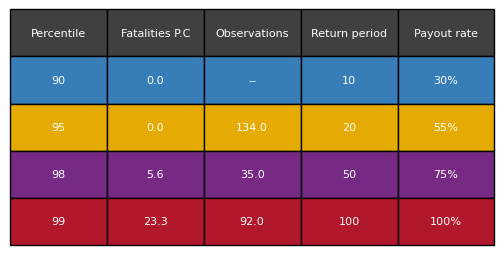

,year,first_value,average_value,20,50,100
0,2021,260.5,8.556606,60,7,20
1,2022,478.6,15.869669,47,17,23
2,2023,1330.4,37.596232,27,11,49


Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Country year/plot_png' already exists.


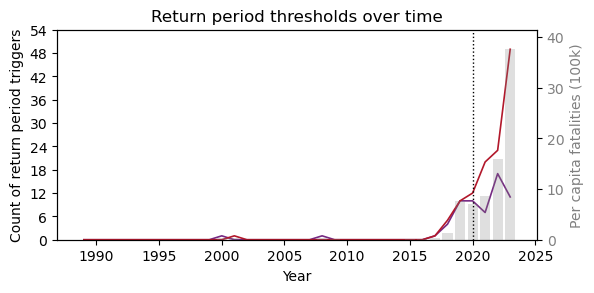

map for: 0


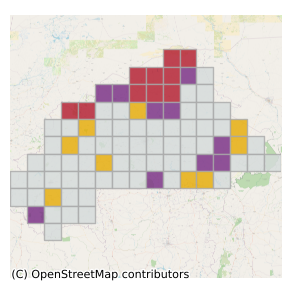

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/historic/map_png/Burkina Faso conflict year 0 in 2019.0  with dimensions 3.50x3.50.png
map for: 1


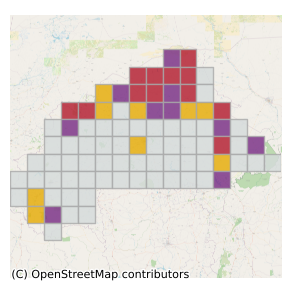

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/historic/map_png/Burkina Faso conflict year 1 in 2020.0  with dimensions 3.50x3.50.png
map for: 2


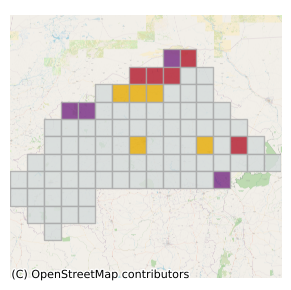

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/historic/map_png/Burkina Faso conflict year 2 in 2018.0  with dimensions 3.50x3.50.png
map for: 3


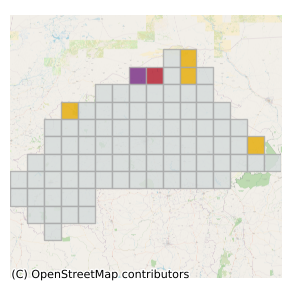

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/historic/map_png/Burkina Faso conflict year 3 in 2017.0  with dimensions 3.50x3.50.png
map for: 4


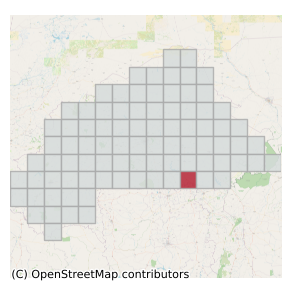

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/historic/map_png/Burkina Faso conflict year 4 in 2001.0  with dimensions 3.50x3.50.png
map for: 0


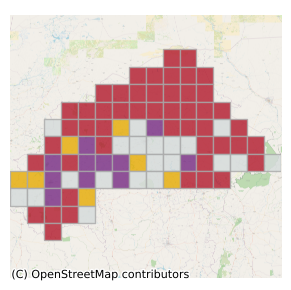

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/out_of_sample/map_png/Burkina Faso conflict year 0 in 2023.0  with dimensions 3.50x3.50.png
map for: 1


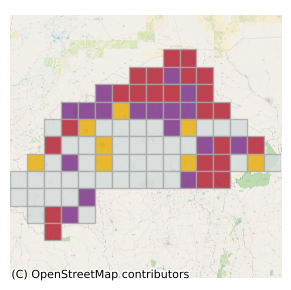

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/out_of_sample/map_png/Burkina Faso conflict year 1 in 2022.0  with dimensions 3.50x3.50.png
map for: 2


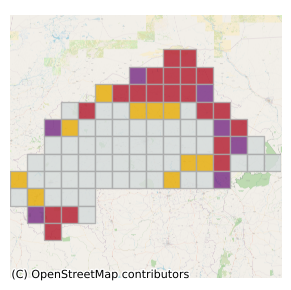

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/out_of_sample/map_png/Burkina Faso conflict year 2 in 2021.0  with dimensions 3.50x3.50.png


In [203]:
# #produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
hist_y_rows = hist_y.shape[0]
expl_y_rows = expl_y.shape[0]
# #make the insurance table columns lowercase to keep in line with JPR standards:
hist_z_limited.columns = hist_z_limited.columns.str.lower()
# print(z)
# #-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(expl_y, field_to_sort='year', number_of_rows=expl_y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)
# #Not as applicable for the Review Years / Predictions which will be standard (I think)
# #--------------------------------------------------------------------------------------------------------------
# #-----This is setting up things to export a map---------------------------------------------------------------
hist_sorted_annual_table = query_and_sort_annual_table(hist_y, field_to_sort=sort_annual_report_by, number_of_rows=hist_y_rows)
hist_sorted_annual_table.iloc[:, 1:] = hist_sorted_annual_table.iloc[:, 1:].round(1)
hist_sorted_annual_table = hist_sorted_annual_table.reset_index(drop=True)
# #Not as applicable for the Review Years / Predictions which will be standard (I think)
# #--------------------------------------------------------------------------------------------------------------
filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(hist_z_limited, color_scheme, insurance_attribute, country, method, returnperiodmethod=return_period, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
display(merged_annual_summary)
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
#plot_and_colorize_annual_table(sorted_annual_table, filtered_info, country, method, return_period, aggregation=aggregation, figure_height=5.5, figure_width=4.0)
#--------------------------------------------------------------------------------------------------------------
# Concatenating the two DataFrames
combined_df = pd.concat([hist_x, expl_x])
combined_df = combined_df.reset_index(drop=True)
plot_histogram_with_lineplot_4(combined_df, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0, vertical_line=conflict_history_max_year)
#--------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------
#Do this for the historic -- Or draw on already processed data
gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(5, hist_y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(hist_sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, hist_x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', type_of_analysis='historic', figure_height=3.5, figure_width=3.5, year_id=annual_event)

evaluate_specific_years = [2021, 2022, 2023]
indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()

# #Use this for the comparative analysis type (predictions or out_of_sample)
for specific_year in range(expl_y_rows):
        print(f'map for: {specific_year}')
        year_to_eval = define_year_to_map(sorted_annual_table, specific_year)
        gdf_merged = query_geodataframe(gdf, expl_x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', type_of_analysis=analysis_type, figure_height=3.5, figure_width=3.5, year_id=specific_year)

In [192]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont
import re

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None



def map_event_cat_rp_OOS(country, method, returnperiodmethod, year_datastart, year_dataend, aggregation='0', row_A_type_of_analysis=None, row_B_type_of_analysis=None, gridlines='no'): 

    if row_A_type_of_analysis is None:
        raise ValueError('A parameter specifying the type of analysis must be set to perform this function')    
    if row_B_type_of_analysis is None:
        raise ValueError('A parameter specifying the type of analysis must be set to perform this function')    
        
    if aggregation == '0':
        raise ValueError('A parameter other than zero must be set to perform this function')        


    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/event_cat_rd_template.png'
    template_image = Image.open(template_path)
    aggregation_string = aggregation + 'x' + aggregation


    if method == 'smoothing':

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        #output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        map_path__rowA = base_directory + '/files/' + country + '/' + aggregation_string + '/' + returnperiodmethod + '/' + row_A_type_of_analysis +'/map_png/'
        print(map_path__rowA)

        map_path__rowB = base_directory + '/files/' + country + '/' + aggregation_string + '/' + returnperiodmethod + '/' + row_B_type_of_analysis +'/map_png/'
        print(map_path__rowB)
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    output_path = base_directory + '/files/Layouts/event_cat_rd/outofsample/' 

    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path__rowA, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')

    year__0 = re.search(r"\b\d{4}\b", map_filename_0)

    # Convert the match to an integer and print
    if year__0:
        year__0 = str(int(year__0.group()))
        print(year__0)

    #Map 2
    map_filename_1 = find_file_with_string(map_path__rowA, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')

    year__1 = re.search(r"\b\d{4}\b", map_filename_1)

    # Convert the match to an integer and print
    if year__1:
        year__1 = str(int(year__1.group()))
        print(year__1)

    map_filename_2 = find_file_with_string(map_path__rowA, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 3: {map_filename_2}')

    year__2 = re.search(r"\b\d{4}\b", map_filename_2)

    # Convert the match to an integer and print
    if year__2:
        year__2 = str(int(year__2.group()))
        print(year__2)

#------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------

    row_B_map_filename_0 = find_file_with_string(map_path__rowB, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {row_B_map_filename_0}')

    row_B_year__0 = re.search(r"\b\d{4}\b", row_B_map_filename_0)

    # Convert the match to an integer and print
    if row_B_year__0:
        row_B_year__0 = str(int(row_B_year__0.group()))
        print(row_B_year__0)

    #Map 2
    row_B_map_filename_1 = find_file_with_string(map_path__rowB, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {row_B_map_filename_1}')

    row_B_year__1 = re.search(r"\b\d{4}\b", row_B_map_filename_1)

    # Convert the match to an integer and print
    if row_B_year__1:
        row_B_year__1 = str(int(row_B_year__1.group()))
        print(row_B_year__1)

    row_B_map_filename_2 = find_file_with_string(map_path__rowB, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 3: {row_B_map_filename_2}')

    row_B_year__2 = re.search(r"\b\d{4}\b", row_B_map_filename_2)

    # Convert the match to an integer and print
    if row_B_year__2:
        row_B_year__2 = str(int(row_B_year__2.group()))
        print(row_B_year__2)


    #annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    #print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')

    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)

    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (745, 110), 'size': (265, 275), 'label': '','filename': map_filename_0, 'folder': map_path__rowA, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1025, 110), 'size': (265, 275), 'label': '','filename': map_filename_1, 'folder': map_path__rowA, 'font_size':9,'line_width': 3},       # Year 1
        {'position': (1305, 110), 'size': (275, 275), 'label': '','filename': map_filename_2, 'folder': map_path__rowA, 'font_size':9,'line_width': 3},       # Year 1

#These are the selected conflict years
        {'position': (745, 505), 'size': (265, 275), 'label': '','filename': row_B_map_filename_0, 'folder': map_path__rowB, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1025, 505), 'size': (265, 275), 'label': '','filename': row_B_map_filename_1, 'folder': map_path__rowB, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1305, 505), 'size': (265, 275), 'label': '','filename': row_B_map_filename_2, 'folder': map_path__rowB, 'font_size':9, 'line_width': 3},       # Year 1


        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'Return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title

        {'position': (800, 385), 'size': (150, 35), 'label': year__0,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top year
        {'position': (1085, 385), 'size': (150, 35), 'label': year__1,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 2 year
        {'position': (1355, 385), 'size': (150, 35), 'label': year__2,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 3 year

        {'position': (800, 785), 'size': (150, 35), 'label': row_B_year__0,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # empty text box
        {'position': (1085, 785), 'size': (150, 35), 'label':  row_B_year__1,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},
        {'position': (1355, 785), 'size': (150, 35), 'label':  row_B_year__2,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'}

    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary
        background_color = title_b['background_color']  # Get the font size from the dictionary
        line_width = title_b['line_width']
        text_color = title_b['text_color']
            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill= background_color, outline="black", width=line_width)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill=text_color, font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
    if returnperiodmethod == 'Event year':
        return_period_definition = 'bigp'
    else:
        return_period_definition = 'littlep'


    output_filename = os.path.join(output_path, f'event_cat_rp_{country}_{aggregation_string}_{return_period_definition}_{year_datastart}_{year_dataend}.png')
    output_filename = output_filename.replace(' ', '_')

    print()
    print('file saved to:')
    print(output_filename)
    template_image.save(output_filename)
    template_image.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [204]:
map_event_cat_rp_OOS(country, method, return_period, explore_min_year, explore_max_year, aggregation, row_A_type_of_analysis='historic', row_B_type_of_analysis=analysis_type)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/historic/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/1x1/Country year/out_of_sample/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Country year/1x1/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/event_cat_rd/outofsample' already exists.
located map rank1: Burkina Faso conflict year 0 in 2019.0  with dimensions 3.50x3.50.png
2019
located map rank 2: Burkina Faso conflict year 1 in 2020.0  with dimensions 3.50x3.50.png
2020
located map rank 3: Burkina Faso conflict year 2 in 2018.0  with dimensions 3.50x3.50.png
2018
located

### map_event_cat_rp:

Gives Top 3 years and 3 select decadal years

In [124]:
map_event_cat_rp(country, method, return_period, explore_min_year, explore_max_year, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/1x1/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/event_cat_rd' already exists.
located map rank1: Israel conflict year 0 in 2023.0  with dimensions 3.50x3.50.png
2023
located map rank 2: Israel conflict year 1 in 2021.0  with dimensions 3.50x3.50.png
2021
located map rank 3: Israel conflict year 2 in 2022.0  with dimensions 3.50x3.50.png
2022
Israel conflict year 29 in 2010.0  with dimensions 3.50x3.50.png
Israel conflict year 20 in 2020.0  with dimensions 3.50x3.50.png
Israel conflict year 26 in 2000.0  with dimensions 

In [16]:
summary_text = 'summary text'

In [17]:
map_top_years(country, method, return_period, summary_text, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/Israel' already exists.
Israel conflict year 0 in 2014.0  with dimensions 3.50x3.50.png
Israel conflict year 1 in 2009.0  with dimensions 3.50x3.50.png
Israel conflict year 2 in 2017.0  with dimensions 3.50x3.50.png
Israel conflict year 3 in 2018.0  with dimensions 3.50x3.50.png
Israel conflict year 4 in 2006.0  with dimensions 3.50x3.50.png
Israel conflict year 5 in 2015.0  with dimensions 3.50x3.50.png
Israel conflict year 6 in 2013.0  with dimensions 3.50x3.50.png
Israel co

In [ ]:
# Define your variables
import pandas as pd
country  # Example value, replace with actual country

max_year = max(y['year'])
min_year = min(y['year'])
print(f'The max year in the dataframe (max_year): {max_year}')
print(f'The min year in the dataframe (max_year): {min_year}')

year_range = f"{min_year}-{max_year}"  # Example value, replace with actual year range
#total_conflict = sum(subset_to_country['fatalities_sum'])  

total_events = len(x)
pg_events = len(pd.unique(x['pg_id']))
total_years = len(pd.unique(x['year']))

#method = "Smoothing"  # Example value, replace with actual method used
#return_period_definition = "Cell-year"  # Example value, replace with actual definition

year_of_greatest_conflict = sorted_annual_table['year'].iloc[0]

row_with_50 = z.loc[z['Return Period'] == 50.0]
row_with_100 = z.loc[z['Return Period'] == 100.0]
row_with_max = z.loc[z['Return Period'] == 'Max']

#greatest_conflict_range = "2010-2020"  # Example value, replace with actual range
payout_rate_value50 = row_with_50[value_field].values[0]
payout_rate_value100 = row_with_100[value_field].values[0]

Occurrence_value50 = row_with_50['Occurrence'].values[0]
Occurrence_value100 = row_with_100['Occurrence'].values[0]
Occurrence_valueMax = row_with_max['Occurrence'].values[0]

total_occurence_over100year = Occurrence_value100 + Occurrence_valueMax

ged_sb_sum = conflict_profile['ged_sb']
ged_ns_sum = conflict_profile['ged_ns']
ged_os_sum = conflict_profile['ged_os']
fatalities_sum = conflict_profile['fatalities_sum']

summary_text = (
    f"During the observed period, a total of {total_events} PRIO-Grid years were analyzed in {country}, spanning from {year_range}. "
    f"Throughout this time range, the conflict profile consists of {ged_os_sum} fatalities from one-sided events, {ged_sb_sum} state-based, and {ged_ns_sum} non-state, producing a total of {fatalities_sum} events."
    f"The analysis employed the {method} method for evaluation. "
    f"The definition of return period applied is {return_period}. "
    f"The year with the highest average conflict was {year_of_greatest_conflict}."
    f"The thresholds for 1 in 50 and 1 in 100 year events were {payout_rate_value50} and {payout_rate_value100}, respectively. "
    f"Occurrences of 1 in 50 year events totaled {Occurrence_value50}, while there were {total_occurence_over100year} occurrences of 1 in 100 year events. "
)

Malawi

no per capita fatalities appear because there are only 2 maybe 3 event which puts any occurence above the 99.9% threshold. because the insurance table rounds o the .1 deceimal -- no fatalities are reports anywhere in the country because there are so few.